## Optical Spectroscopy

Like always, import the important libraries.

In [137]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
import scipy.interpolate as interp

Now import the biases using the same technique as lab 4.

In [67]:
path = '/Users/shearert/Desktop/lsa-ast361/Work/shearert/lab6/optical-spectroscopy/data/' #where all the data is located
biases = []
for i in range (1,11):    #getting the bias frames
    biases.append(fits.getdata(path+'nov_7Bias'+"0"*(8-len(str(i)))+str(i)+'.fit', ext=0).astype(np.int))
avbias = np.array(biases).mean(axis=0)

Now import all of the spectrograph frames and background frames for the Helium, Neon, and Solar spectra.

In [68]:
helamp=[]
nelamp=[]
lampbkg=[]
sun=[]
sunbkg=[]

for i in range(1,4):
    helamp.append(fits.getdata(path+'nov_7HE'+str(i)+'.fit', ext=0).astype(np.int))
for i in range(1,4):
    nelamp.append(fits.getdata(path+'nov_7NE'+str(i)+'.fit',ext=0).astype(np.int))
for i in range(1,4):
    lampbkg.append(fits.getdata(path+'nov_7bkg-3s-'+str(i)+'.fit',ext=0).astype(np.int))
for i in range(1,4):
    sun.append(fits.getdata(path+'nov_7SUN'+str(i)+'.fit',ext=0).astype(np.int))
for i in range(1,4):
    sunbkg.append(fits.getdata(path+'nov_7bkg-60s-'+str(i)+'.fit',ext=0).astype(np.int))

Subtract the Bias frames from each of the spectrographs to normalize the data.

In [69]:
helampsubbias = [lamp-avbias for lamp in helamp]
nelampsubbias = [lamp-avbias for lamp in nelamp]
lampbkgsubbias = [lamp-avbias for lamp in lampbkg]
sunsubbias = [point-avbias for point in sun]
sunbkgsubbias = [point-avbias for point in sunbkg]

Now find the mean values per pixel over the given number of frames taken for the background frames.

In [70]:
avlampbkg = np.array(lampbkgsubbias).mean(axis=0)
avsunbkg = np.array(sunbkgsubbias).mean(axis=0)

Now eliminate the background frames from the spectrographs based on how long each exposure was for each of the spectrograph frames.

In [71]:
avhelampwbkg = [lamppoint-avlampbkg for lamppoint in helampsubbias]
avnelampwbkg = [lamppoint-avlampbkg for lamppoint in nelampsubbias]
avsunwbkg = [sunpoint-avsunbkg for sunpoint in sunsubbias]

Now average the spectrographs per pixel based on the number of frames taken per spectrograph. Also show that the size of each array matches the size of the spectrograph plates.

In [259]:
avhelamp = np.array(avhelampwbkg).mean(axis=0)
avnelamp = np.array(avnelampwbkg).mean(axis=0)
avsun = np.array(avsunwbkg).mean(axis=0)

print("Shape of the experimental data arrays =",np.array(avhelamp).shape)

Shape of the experimental data arrays = (1020, 1530)


Plot the raw Helium and Neon spectrograph frames.

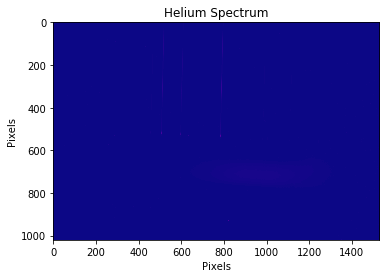

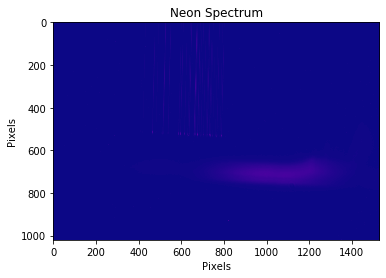

In [299]:
plt.imshow(avhelamp,cmap='plasma')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.title('Helium Spectrum')
plt.show()
plt.imshow(avnelamp,cmap='plasma')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.title('Neon Spectrum')
plt.show()

Now narrow down each frame into a smaller slit that shows the bands that we want to observe.

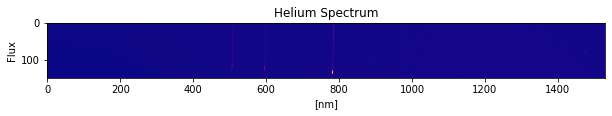

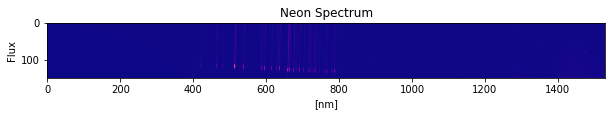

In [300]:
fig1 = plt.figure(figsize=(10,8))
plt.imshow(avhelamp[400:550,:],cmap='plasma')
plt.xlabel('[nm]')
plt.ylabel('Flux')
plt.title('Helium Spectrum')
plt.show()
fig2 = plt.figure(figsize=(10,8))
plt.imshow(avnelamp[400:550,:],cmap='plasma')
plt.xlabel('[nm]')
plt.ylabel('Flux')
plt.title('Neon Spectrum')
plt.show()

Set up functions that transform pixels into angstroms and vice versa based that each pixel is approximately 4.3 Angstroms and then the entire frame needs to be shifted 2675 Angstroms higher.

Text(0.5, 1.0, 'Pixels vs. Angstroms')

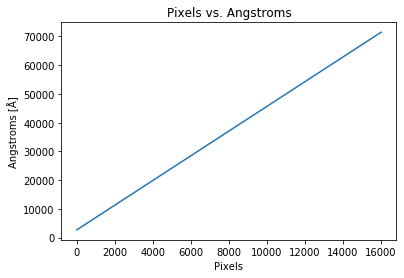

In [332]:
pixels=np.linspace(0,16000,5)
def angstroms(pix):
    return pix*4.3+2675
def revangs(ang):
    return (ang-2675)/4.3

corval = 4.3
shift = 2675

plt.plot(pixels,angstroms(pixels))
plt.xlabel('Pixels')
plt.ylabel('Angstroms [Å]')
plt.title('Pixels vs. Angstroms')

Use the conversion factor as well as the raw Helium data to plot the Helium flux versus pixels and versus angstroms given that the Helium data is the average of each column, giving a size of 1530 pixels across and flipped so that the shorter wavelengths tend towards 0 on the left. This is then plotted with 3 known wavelengths that Helium emmits and compared to show that the angstrom conversion holds true for this test case.

Size of the wavelength array = 1530
The Correctional value between angstroms and pixels is:  4.3 Å/pix
The shift needed to align the minimums of both spectra is:  2675 Å
Calibrations were made using the following wavelengths for Helium [Å] :  [4471.48, 5015.68, 5875.62, 5875.97, 6678.15, 7065.19]
These values fall at pixel numbers : [417, 544, 744, 744, 930, 1020]


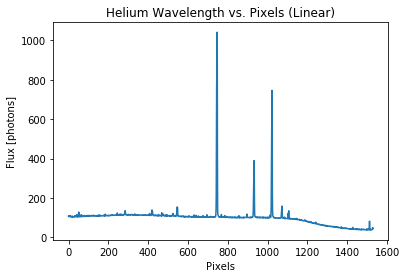

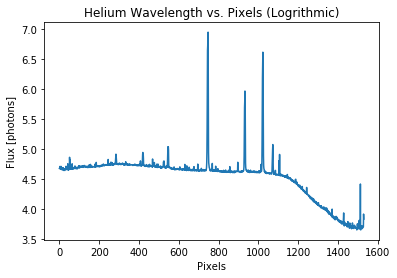

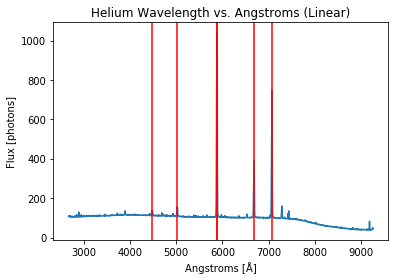

Text(0.5, 1.0, 'Helium Wavelength vs. Angstroms (Logrithmic)')

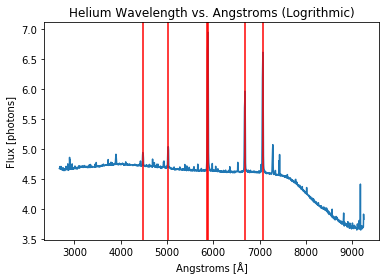

In [318]:
expheangline = np.flip(np.array(avhelamp[400:550,:]).mean(axis=0),0)

hepixline=np.linspace(0,len(expheangline),len(expheangline))
print("Size of the wavelength array =",expheangline.size)
heanglineval=[4471.48,5015.68,5875.62,5875.97,6678.15,7065.19]

correction = hepixline*corval

hepixnumb = [int((heanglineval[x]-shift)/corval) for x in range(len(heanglineval))]

print('The Correctional value between angstroms and pixels is: ',corval,'Å/pix')
print('The shift needed to align the minimums of both spectra is: ', shift,'Å')

print('Calibrations were made using the following wavelengths for Helium [Å] : ',heanglineval)
print('These values fall at pixel numbers :',hepixnumb)

plt.plot(expheangline)
plt.xlabel('Pixels')
plt.ylabel('Flux [photons]')
plt.title('Helium Wavelength vs. Pixels (Linear)')
plt.show()

plt.plot(np.log(expheangline))
plt.xlabel('Pixels')
plt.ylabel('Flux [photons]')
plt.title('Helium Wavelength vs. Pixels (Logrithmic)')
plt.show()

plt.plot(correction+shift,expheangline)
for line in heanglineval:
    plt.axvline(line,color='r')
plt.xlabel('Angstroms [Å]')
plt.ylabel('Flux [photons]')
plt.title('Helium Wavelength vs. Angstroms (Linear)')
plt.show()

plt.plot(correction+shift,np.log(expheangline))
for line in heanglineval:
    plt.axvline(line,color='r')
plt.xlabel('Angstroms [Å]')
plt.ylabel('Flux [photons]')
plt.title('Helium Wavelength vs. Angstroms (Logrithmic)')


Use the conversion factor as well as the raw Neon data to plot the Helium flux versus pixels and versus angstroms given that the Neon data is the average of each column, giving a size of 1530 pixels across and flipped so that the shorter wavelengths tend towards 0 on the left. This is then plotted with 3 known wavelengths that Neon emmits and compared to show that the angstrom conversion holds true for this test case.

Size of the wavelength array = 1530
The Correctional value between angstroms and pixels is:  4.3 Å/pix
The shift needed to align the minimums of both spectra is:  2675 Å
Calibrations were made using the following wavelengths for Neon [Å]:  [4219.74, 4569.06, 5852.49, 6128.15, 6402.25, 6598.95, 7032.41]
These values fall at pixel numbers : [359, 440, 738, 803, 866, 912, 1013]


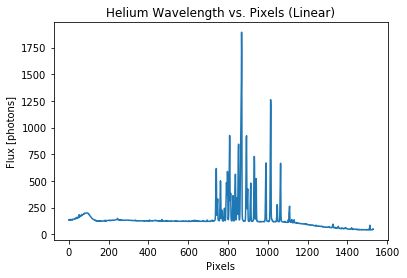

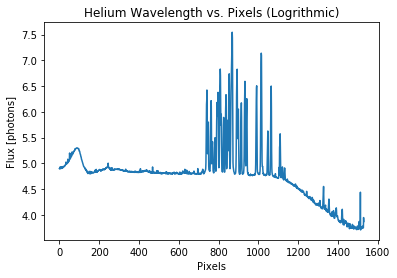

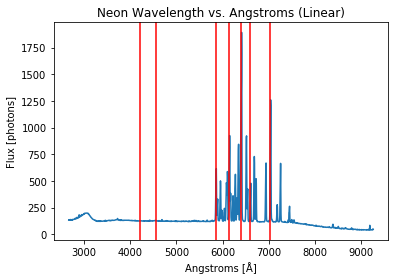

Text(0.5, 1.0, 'Neon Wavelength vs. Angstroms (Logrithmic)')

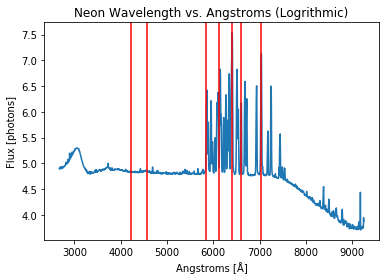

In [319]:
expneangline = np.flip(np.array(avnelamp[400:550,:]).mean(axis=0),0)

hepixline=np.linspace(0,len(expneangline),len(expneangline))
print("Size of the wavelength array =",expneangline.size)
neanglineval=[4219.74,4569.06,5852.49,6128.15,6402.25,6598.95,7032.41]


correction = hepixline*corval


nepixnumb = [int((neanglineval[x]-shift)/corval) for x in range(len(neanglineval))]


print('The Correctional value between angstroms and pixels is: ',corval,'Å/pix')
print('The shift needed to align the minimums of both spectra is: ', shift,'Å')

print('Calibrations were made using the following wavelengths for Neon [Å]: ',neanglineval)
print('These values fall at pixel numbers :',nepixnumb)


plt.plot(expneangline)
plt.xlabel('Pixels')
plt.ylabel('Flux [photons]')
plt.title('Helium Wavelength vs. Pixels (Linear)')
plt.show()

plt.plot(np.log(expneangline))
plt.xlabel('Pixels')
plt.ylabel('Flux [photons]')
plt.title('Helium Wavelength vs. Pixels (Logrithmic)')
plt.show()

plt.plot(correction+shift,expneangline)
for line in neanglineval:
    plt.axvline(line,color='r')
plt.xlabel('Angstroms [Å]')
plt.ylabel('Flux [photons]')
plt.title('Neon Wavelength vs. Angstroms (Linear)')
plt.show()

plt.plot(correction+shift,np.log(expneangline))
for line in neanglineval:
    plt.axvline(line,color='r')
plt.xlabel('Angstroms [Å]')
plt.ylabel('Flux [photons]')
plt.title('Neon Wavelength vs. Angstroms (Logrithmic)')

Plotting the full solar frame after we have proven that the pixel angstrom conversion works for all emmisions

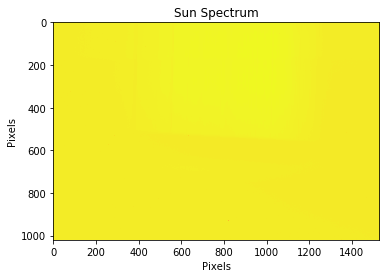

In [320]:
plt.imshow(avsun,cmap='plasma')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.title('Sun Spectrum')
plt.show()

Plotting the part of the full frame that contains the absorption lines that we wish to observe.

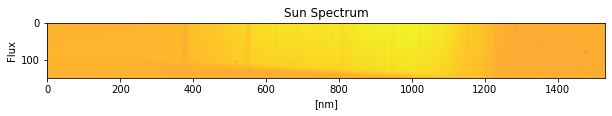

In [348]:
fig3 = plt.figure(figsize=(10,8))
plt.imshow(avsun[400:550,:],cmap='plasma')
plt.xlabel('[nm]')
plt.ylabel('Flux')
plt.title('Sun Spectrum')
plt.show()

Picking the wavelength values given form the Fraunhofer values, as well as converting them into the pixel values that would correspond with them.

In [336]:
sunanglineval=np.array([3968.47,3933.66,4340.47,4307.90,4307.74,4861.34,6562.81,5895.92,5889.95,5875.618,5183.62,5172.70,5167.73])
sunpixlineval = revangs(sunanglineval)
print('The approximate pixel values for all of the absorption lines given under the Fraunhofer lines are: ')
print(sunpixlineval)

The approximate pixel values for all of the absorption lines given under the Fraunhofer lines are: 
[300.80697674 292.71162791 387.31860465 379.74418605 379.70697674
 508.45116279 904.14186047 749.05116279 747.6627907  744.32976744
 583.4        580.86046512 579.70465116]


Choosing values of the pixels where absorption lines can be approximated and then transforming those into the Angstrom values that would correspond with those.

In [344]:
testpix = np.array([395,530,875,940,1155])
testang = angstroms(testpix)
print('With absorption dips at pixels:', testpix, 'We can use the pixel to angstrom conversion to get the')
print('following wavelength values: ')
print(testang)

With absorption dips at pixels: [ 395  530  875  940 1155] We can use the pixel to angstrom conversion to get the
following wavelength values: 
[4373.5 4954.  6437.5 6717.  7641.5]


Plotting the spectrographs of the solar frames versus pixels and versus angstroms. This is plotted in both linear and logrithmic scales for both. The angstrom plots are overlayed with the Fraunhofer values in red as well as the approximate angstrom values found from the estimated pixel values of some of the major absorption lines. Some match up, some don't, it was based on the approximate pixel value chosen.

Size of the wavelength array = 1530
The Correctional value between angstroms and pixels is:  4.3 Å/pix
The shift needed to align the minimums of both spectra is:  2675 Å
Calibrations were made using the following wavelengths for Sun [Å] :  [3968.47  3933.66  4340.47  4307.9   4307.74  4861.34  6562.81  5895.92
 5889.95  5875.618 5183.62  5172.7   5167.73 ]
These values fall at pixel numbers : [300, 292, 387, 379, 379, 508, 904, 749, 747, 744, 583, 580, 579]


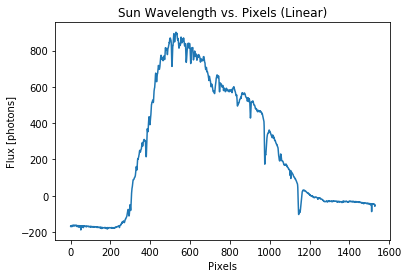

/usr/local/anaconda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


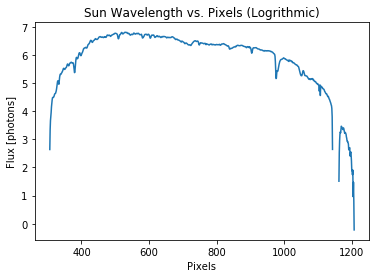

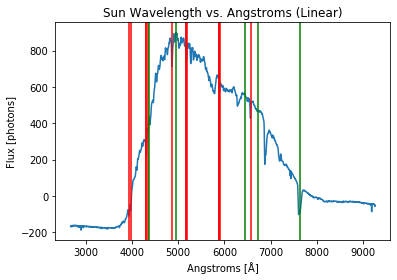

/usr/local/anaconda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in log


Text(0.5, 1.0, 'Sun Wavelength vs. Angstroms (Logrithmic)')

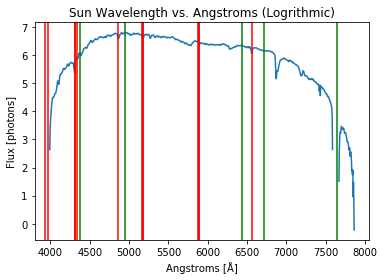

In [347]:
expsunangline = np.flip(np.array(avsun[400:550,:]).mean(axis=0),0)

sunpixline=np.linspace(0,len(expsunangline),len(expsunangline))
print("Size of the wavelength array =",expsunangline.size)

corval = 4.3
correction = sunpixline*corval
shift = 2675

sunpixnumb = [int((sunanglineval[x]-2675)/corval) for x in range(len(sunanglineval))]

print('The Correctional value between angstroms and pixels is: ',corval,'Å/pix')
print('The shift needed to align the minimums of both spectra is: ', shift,'Å')

print('Calibrations were made using the following wavelengths for Sun [Å] : ',sunanglineval)
print('These values fall at pixel numbers :',sunpixnumb)

plt.plot(expsunangline)
plt.xlabel('Pixels')
plt.ylabel('Flux [photons]')
plt.title('Sun Wavelength vs. Pixels (Linear)')
plt.show()

plt.plot(sunpixline,np.log(expsunangline))
plt.xlabel('Pixels')
plt.ylabel('Flux [photons]')
plt.title('Sun Wavelength vs. Pixels (Logrithmic)')
plt.show()

plt.plot(correction+shift,expsunangline)
for line in sunanglineval:
    plt.axvline(line,color='r')
for line in testang:
    plt.axvline(line,color='g')
plt.xlabel('Angstroms [Å]')
plt.ylabel('Flux [photons]')
plt.title('Sun Wavelength vs. Angstroms (Linear)')
plt.show()

plt.plot(correction+shift,np.log(expsunangline))
for line in sunanglineval:
    plt.axvline(line,color='r')
for line in testang:
    plt.axvline(line,color='g')
plt.xlabel('Angstroms [Å]')
plt.ylabel('Flux [photons]')
plt.title('Sun Wavelength vs. Angstroms (Logrithmic)')
